In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos,sin,pi


In [2]:
def getData(filePath):
    '''
    Récupére les données envoyés par le Lidar
    '''

    x = np.array([])
    y = np.array([])

    with open(filePath, 'r') as fr:       #Ouvre le fichier texte
        linesTxt = fr.readlines()
        ptr = 1
        with open('./RPLIDAR2.txt','w') as fw:
            for lineTxt in linesTxt:                        # Enlève les 3 premieres lignes du fichier et rempli dans RPLIDAR2.txt
                if (ptr !=1 and ptr != 2 and ptr != 3):
                    l=lineTxt.split(' ')
                    x = np.append(x,l[0]) 
                    y = np.append(y,l[1])
                    fw.write(lineTxt)
                ptr += 1
            fw.close()
        fr.close()

    A = np.concatenate([[x], [y]], axis=0)

    return A

In [3]:
def changeBase(A):
    '''
    Passage des données en une base (distance, angle) en une base (x, y)
    '''
    #A = getData()
    X = np.array([])
    Y = np.array([])
    for (dist,angle) in zip(A[0,:],A[1,:]) :
        dist_i=float(dist)
        angle_i=float(angle)
        b1=angle_i*cos(dist_i*pi/180)/1000
        b2=angle_i*sin(dist_i*pi/180)/1000
        X=np.append(X, b1)
        Y=np.append(Y, b2)

    return X, Y

In [4]:
T0 = getData('T0.txt')
X0, Y0 = changeBase(T0)

T1 = getData('T1_tr15_rot90.txt')
X1, Y1 = changeBase(T1)



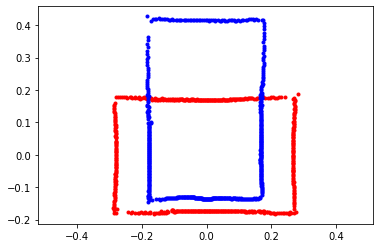

In [5]:
plt.figure(1)
plt.plot(X0, Y0, 'r.')
plt.plot(X1, Y1, 'b.')
plt.axis('equal')
plt.show()

In [11]:
K = min( len(Y0), len(X0), len(Y1), len(X1) )

ROT = np.matrix([[0,-1],[1,0]])
X2 = np.array([])
Y2 = np.array([])

In [12]:
for i in range(K):
    u = np.matrix([[X1[i]],[Y1[i]]])
    v = np.dot(ROT,u)
    X2 = np.append(X2, v[0,0])
    Y2 = np.append(Y2, v[1,0])

In [ ]:
print(v)

[[0.01073351]
 [0.26578336]]


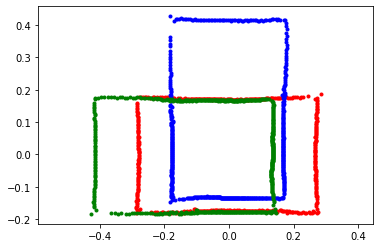

In [13]:
plt.figure(1)
plt.plot(X0, Y0, 'r.')
plt.plot(X1, Y1, 'b.')
plt.plot(X2, Y2, 'g.')
plt.axis('equal')
plt.show()